In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy

In [2]:
df = pd.read_excel("data/sebrae.xls")

In [3]:
df.columns

Index(['N. da manifestação', 'Situação', 'Área de tratamento', 'Relato',
       'Natureza', 'Assunto principal', 'Sub assunto 1', 'Sub assunto 2',
       'Sub assunto 3', 'Produto serviço', 'Canal de entrada',
       'Cliente interno', 'Cidade do cliente', 'UF do cliente',
       'Dt. cadastro manifestação', 'Previsão de conclusão', 'Tempo resposta'],
      dtype='object')

In [4]:
print(df.shape)
df.head(3)

(1286, 17)


,N. da manifestação,Situação,Área de tratamento,Relato,Natureza,Assunto principal,Sub assunto 1,Sub assunto 2,Sub assunto 3,Produto serviço,Canal de entrada,Cliente interno,Cidade do cliente,UF do cliente,Dt. cadastro manifestação,Previsão de conclusão,Tempo resposta
0,76432018,Finalizada,Sebrae/AC,Boa tarde.\n\nDesde algum tempo que acompanho ...,Solicitação,Atendimento Sebrae,Online/Chat,Cadastro,NaN,NaN,Portal,Não,NaN,NaN,25/10/2018 13:25,04/11/2018,6
1,85632018,Finalizada,Sebrae/AC,Sou Julio Cesar Freitas moro na cidade de Rio ...,Reclamação,Atendimento Sebrae,Presencial,Falta de retorno,NaN,NaN,Portal,Não,Rio Branco,AC,06/12/2018 12:15,16/12/2018,15
2,87912018,Finalizada,Sebrae/AC,o meu programa de nfe nao esta mais instalando,Solicitação,Emissor de Nota Fiscal - NF-e/CT-e,NaN,NaN,NaN,NaN,Chatbot,Não,NaN,AC,19/12/2018 18:54,29/12/2018,2


### Distribuição das manifestações por categoria

Solicitação    507
Reclamação     454
Elogio         204
Sugestão        78
Crítica         43
Name: Natureza, dtype: int64


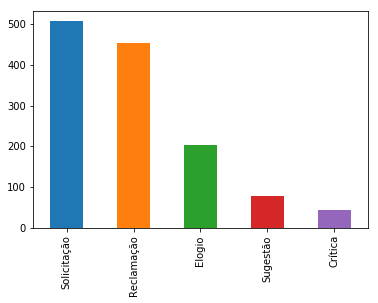

In [5]:
print(df.Natureza.value_counts())
df.Natureza.value_counts().plot.bar()

### Qtd de reclamações por estado

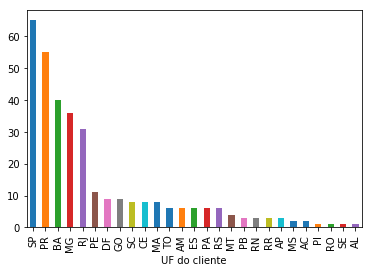

In [6]:
grouped = df.loc[df.Natureza=='Reclamação'].groupby('UF do cliente')
grouped['N. da manifestação'].count().sort_values(ascending=False).plot.bar()

### Qtd de elogios por estado

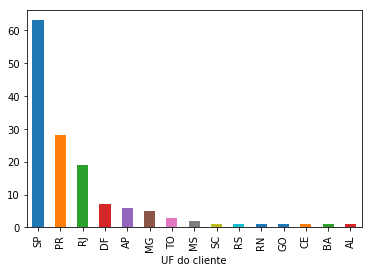

In [7]:
grouped = df.loc[df.Natureza=='Elogio'].groupby('UF do cliente')
grouped['N. da manifestação'].count().sort_values(ascending=False).plot.bar()

### Tamanho medio das manifestações

In [8]:
ct = 0
word_count = 0
len_count = 0
for sentiment in df.Relato:
    
    #print(len(sentiment.split()))
    word_count += len(sentiment.split())
    len_count += len(sentiment)
    
    ct +=1

In [9]:
print("qtd media de palavras:", int(word_count/ct))
print("qtd media de caracteres:", int(len_count/ct))

qtd media de palavras: 83
qtd media de caracteres: 530


### Remove stop words

In [10]:
def remove_stop_words(df,words):
    for word in words:
        word = " " + word + " "
        df.Relato = df.Relato.str.replace(word,' ')
    return df

In [11]:
stop_words = ['de','e','a','o','quem','que','do','para','no',
             'em','da','um','uma','com','na','por','me','O',
             'ao','é','como','foi','as','os','meu','A','se',
             '-','eu','DE','pelo','E','mas','minha','dos',
             'pela','ou','pois','at','já','DO','QUE','das',
             'No',',','nos','ser','está','O','esse','at',
              'estou','Atenciosamente', 'Bom dia','sem','O',
             'Estou','No','EM','Por','sobre','tem','É','à',
             'pra','ter','tudo','A','Eu','você','DA','esta',
             'sua','PARA','onde','estava','.','fui','Como',
             'quando','NO','aos','até','essa','este','sou',
              '–','at','No']

df2 = remove_stop_words(df,stop_words)

### Palavras mais comuns do dataset

In [12]:
reviews = df2.Relato

all_text = ' '.join(reviews)
words = all_text.split()

In [13]:
counts = Counter(words)

## Removendo algumas stop words que apareceram primeiro
counts.most_common()[:30]
#for palavra,qtd in counts.most_common():
#    print(palavra)

[('não', 1297),
 ('Sebrae', 360),
 ('dia', 322),
 ('mais', 299),
 ('curso', 293),
 ('muito', 262),
 ('fazer', 246),
 ('empresa', 234),
 ('atendimento', 212),
 ('SEBRAE', 212),
 ('saber', 202),
 ('Boa', 167),
 ('mesmo', 161),
 ('Gostaria', 160),
 ('at', 160),
 ('site', 154),
 ('gostaria', 150),
 ('contato', 142),
 ('MEI', 141),
 ('e-mail', 141),
 ('tenho', 131),
 ('todos', 125),
 ('ele', 123),
 ('Bom', 123),
 ('Não', 120),
 ('isso', 120),
 ('informações', 114),
 ('O', 114),
 ('só', 113),
 ('seu', 111)]

### Palavras mais comuns da categoria reclamação

In [14]:
reviews = df.loc[df.Natureza=='Reclamação'].Relato

all_text = ' '.join(reviews)
words = all_text.split()
counts = Counter(words)

## Removendo algumas stop words que apareceram primeiro
counts.most_common()[:30]

[('não', 717),
 ('dia', 191),
 ('Sebrae', 182),
 ('curso', 150),
 ('mais', 131),
 ('fazer', 116),
 ('SEBRAE', 108),
 ('empresa', 103),
 ('atendimento', 99),
 ('mesmo', 90),
 ('site', 83),
 ('ele', 79),
 ('contato', 78),
 ('cliente', 77),
 ('e-mail', 74),
 ('só', 67),
 ('muito', 67),
 ('ela', 67),
 ('NÃO', 66),
 ('isso', 64),
 ('pessoas', 59),
 ('No', 57),
 ('tinha', 57),
 ('Não', 55),
 ('Cliente', 55),
 ('MEI', 54),
 ('Boa', 54),
 ('falta', 53),
 ('sistema', 53),
 ('via', 53)]

### Palavras mais comuns da categoria elogio

In [15]:
reviews = df.loc[df.Natureza=='Elogio'].Relato

all_text = ' '.join(reviews)
words = all_text.split()
counts = Counter(words)

## Removendo algumas stop words que apareceram primeiro
counts.most_common()[:30]

[('muito', 121),
 ('atendimento', 73),
 ('Sebrae', 53),
 ('elogio', 39),
 ('recebeu', 39),
 ('não', 38),
 ('pesquisa', 38),
 ('recebido', 36),
 ('Cliente', 35),
 ('SEBRAE', 32),
 ('Elogio', 30),
 ('dia', 30),
 ('via', 29),
 ('nossa', 28),
 ('bem', 27),
 ('Gostaria', 27),
 ('equipe', 26),
 ('bom', 26),
 ('deixar', 26),
 ('curso', 26),
 ('todos', 25),
 ('agradecer', 25),
 ('mais', 25),
 ('seu', 24),
 ('contato', 24),
 ('e-mail', 23),
 ('todas', 22),
 ('saber', 22),
 ('entrou', 22),
 ('excelente', 21)]

### Extração de entidades

In [16]:
nlp = spacy.load('pt_core_news_sm')
textos = df.Relato[:2]
for texto in textos:
    print("texto:", texto)
    print("entidades:")
    doc = nlp(texto)
    for ent in doc.ents:
        print("entidade:", ent.text, ", posicoes:", ent.start_char,",", ent.end_char, ent.label_)
    print()

texto: Boa tarde.

Desde algum tempo acompanho vossa informação porque bastante interesse. Desde meus parabéns.
Gostaria continuar aceder vosso site necessário colocar  CPF, estado cidade, dado não enquadro, português. fazer cadastrar?

Cumprimentos,
Luís Espadana
entidades:
entidade: Gostaria continuar aceder vosso site necessário , posicoes: 105 , 152 MISC
entidade: CPF , posicoes: 162 , 165 ORG
entidade: Luís Espadana , posicoes: 244 , 257 PER

texto: Sou Julio Cesar Freitas moro cidade Rio Branco venho manifestar insatisfação atendimento Sebrae-AC.
Essa terceira vez anos procuro Sebrae local buscando  orientações informações iniciar negócio idealizado, não tenho tido “sorte”.
O processo atendimento parece não fluxo padronizado. impressão tive, nas vezes procurei atendimento, existe enorme abismo entre serviço propagandeado Sebrae realidade atendimento.
Quero dizer acolhimento menos inicial nunca consegui passar dele não fluidez.
Na experiência, particularmente, sempre apareceram ob